In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN,KMeans

import clustergraph.clustergraph as cg
import clustergraph.distances as d
import clustergraph.plotting as cp
import clustergraph.metric_distortion as md


%matplotlib widget

circle = pd.read_csv("data/points", sep ='\t', header =None) 
X = circle.to_numpy()
X

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.00999983,  0.99995   ,  0.03998933],
       [ 0.01999867,  0.99980001,  0.07991469],
       ...,
       [-0.0031853 ,  0.99999493, -0.01274088],
       [ 0.00681464,  0.99997678,  0.0272554 ],
       [ 0.0168139 ,  0.99985864,  0.06720807]])

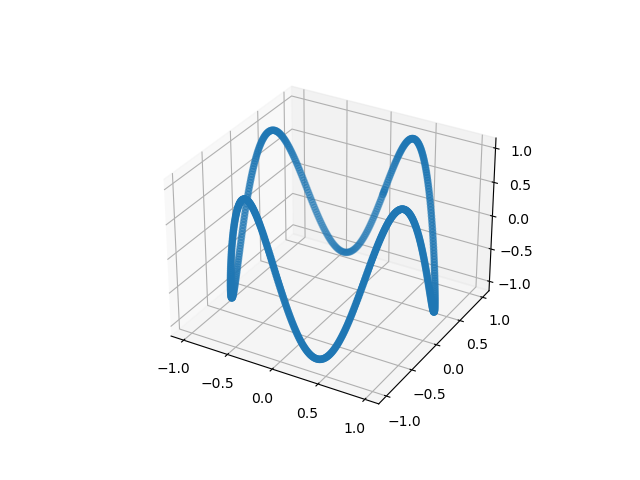

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1]  , X[:,2] ) 

plt.show()

In [3]:
model_KM = KMeans(24, random_state =42)
prediction_KM =model_KM.fit_predict(X)

# Get the clusters from the predictions
clusters = cg.get_clusters_from_scikit(prediction_KM)

# Creation of the distance_between_clusters object
distance_clusters_ = d.Creation_distances( clusters = clusters, X = X, metric_clusters = "avg").get_distance_cluster()
  
# Creation of the object
cluster_g_KM = cg.ClusterGraph(distance_clusters_)

# Compute the distances between all the clusters
cluster_g_KM.distances_clusters(normalize = False)



C:\Users\mathi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Central Vertice 10
Farthest away Vertice 15
Vertices and size {1: 42, 2: 46, 3: 17, 4: 18, 5: 17, 6: 44, 7: 47, 8: 17, 9: 42, 10: 20, 11: 17, 12: 17, 13: 17, 14: 18, 15: 42, 16: 18, 17: 44, 18: 18, 19: 17, 20: 18, 21: 18, 22: 42, 23: 18, 24: 17}


### Visualizing ClusterGraph 

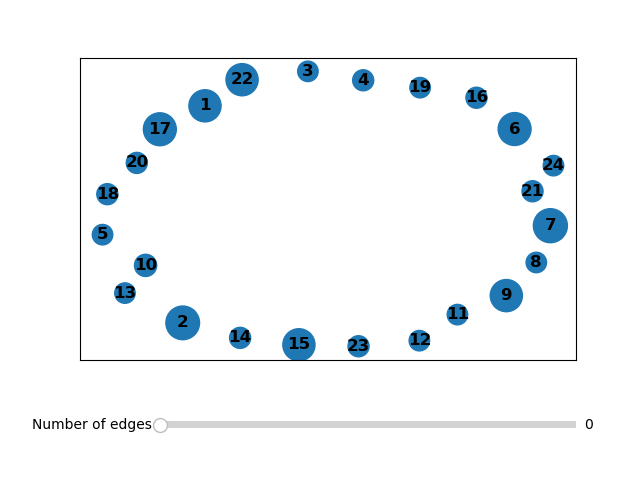

In [7]:
%matplotlib widget
keep = cp.draw_distances_graph(cluster_g_KM.graph)

# Metric distortion of a ClusterGraph (score)

## Creation of the K-Nearest Neighbors Graph

In [4]:
%%time

from sklearn.neighbors import NearestNeighbors
import networkx as nx


nb = 3
neigh = NearestNeighbors(n_neighbors = nb,  radius = 1)
neigh.fit(X=X)
nn_adjacency = neigh.kneighbors_graph(X= X , n_neighbors = nb, mode='distance')

nn_Graph = nx.from_scipy_sparse_array(nn_adjacency, edge_attribute = 'label')

## remove self edges
for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node,node)
    
nx.number_connected_components(nn_Graph)

CPU times: total: 0 ns
Wall time: 7 ms


1

## Metric distortion before pruning

Score for ClusterGraph before the edge pruning :  0.07598452835580123


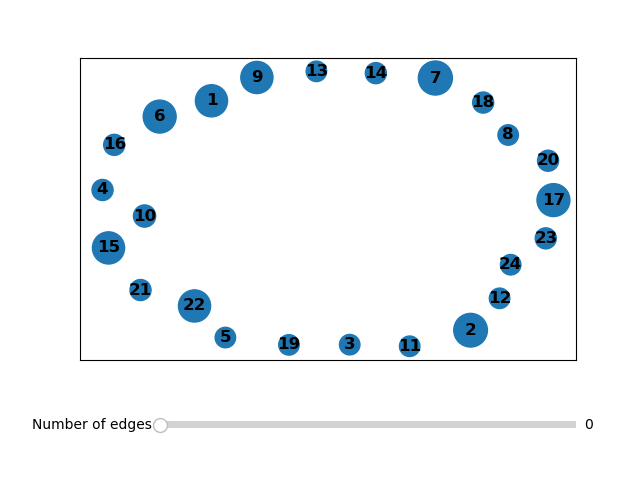

In [8]:
km_dist = md.metric_distortion_edges_CG( cluster_g_KM.graph , nn_Graph, variable= 'label' ) 

print("Score for ClusterGraph before the edge pruning : ", km_dist )

%matplotlib widget
keep = cp.draw_distances_graph(cluster_g_KM.graph)

## Metric Distortion after edge pruning

In [ ]:

%matplotlib widget
keep = cp.draw_distances_graph(g_pruned)

c1 =[1,2]c2 = [5]

c3 [ 10


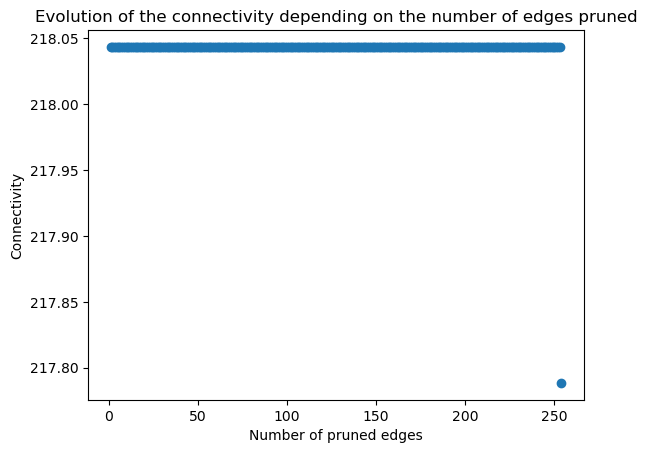

Score for ClusterGraph after the edge pruning :  0.012163466593743729


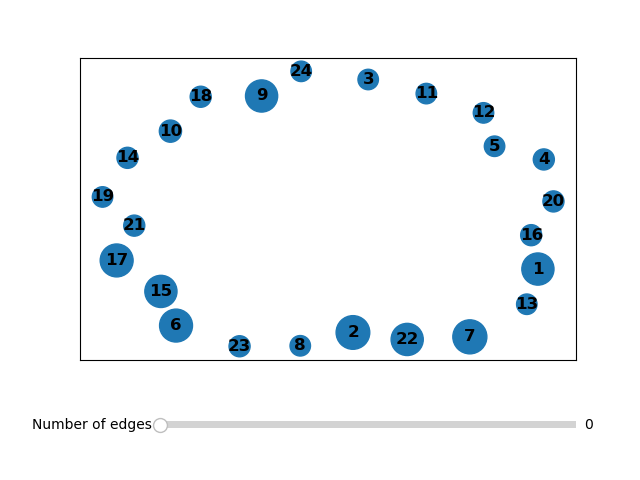

CPU times: total: 2min 57s
Wall time: 2min 58s


In [5]:
%%time

%matplotlib inline

g_pruned = md.md_cg_pruned(cluster_g_KM.graph , nn_Graph, clusters, variable = 'label', plot_connectivity = True )

km_dist_after = md.metric_distortion_edges_CG( g_pruned , nn_Graph, variable= 'label' ) 

print("Score for ClusterGraph after the edge pruning : ", km_dist_after )

%matplotlib widget
keep = cp.draw_distances_graph(g_pruned)

# Comparison ClusterGraph and PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_stand = scaler.fit_transform(X)
pca = PCA(2)
X_pca = pca.fit_transform(X_stand)

print(np.sum(pca.explained_variance_ratio_) )
pca.explained_variance_ratio_

Visualization comparing ClusterGraph and the points cloud obtained from Umap

In [ ]:
t_left = "ClusterGraph"
t_right = 'Points cloud from PCA'
info_1 = cluster_g_KM.graph

nb_1 = 46

cp.compare_graph_cloud( info_graph = info_1,
    X_cloud= X_pca , nb_edges= nb_1, title_left=t_left,
    title_right= t_right,
    size_points=6, MIN_SCALE=7, MAX_SCALE=20, font_size_edges_labels= "20px" )
